In [3]:
# %pip install easyocr 
# %pip install imutils 
# %pip install opencv-python 
# %pip install matplotlib

In [4]:
import cv2 
from matplotlib import pyplot as plt
import numpy as np
import easyocr
import imutils
import random

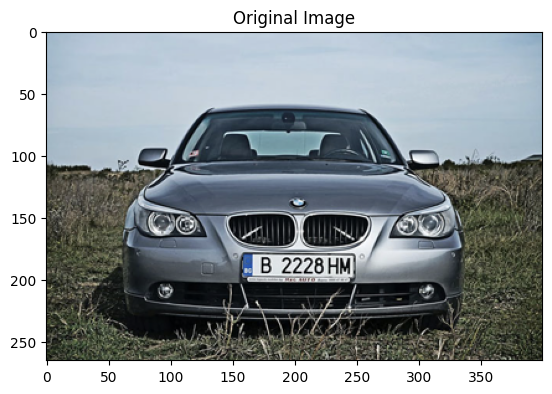

Text(0.5, 1.0, 'Processed Image')

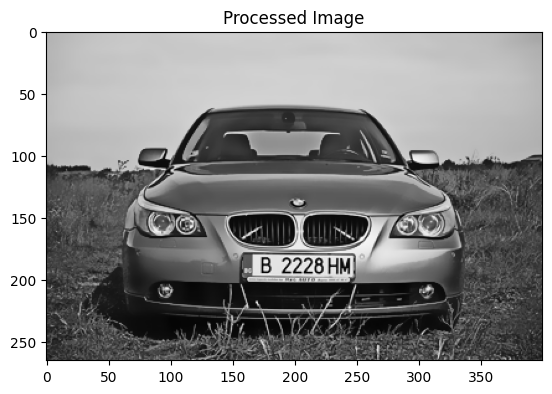

In [ ]:
ruta = "C:/Users/delahozce/OneDrive - GLOBAL HITSS/Documentos/Proyectos/Codes/git_portafolio/Portafolio/data/imagenes_carros/"
img = cv2.imread(ruta + "Cars120.png") #read image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert image to gray
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
plt.imshow(cv2.cvtColor(bfilter, cv2.COLOR_BGR2RGB)) #show processed image
plt.title('Processed Image')

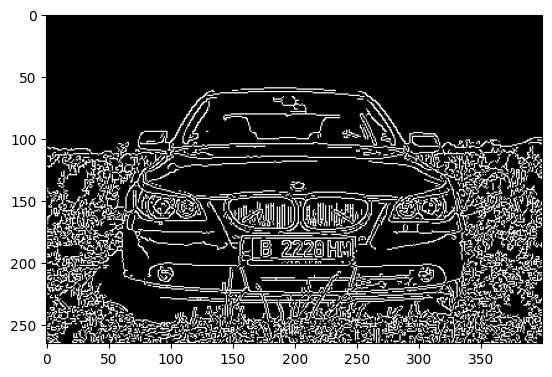

In [14]:
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [15]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #Find contours 
contours = imutils.grab_contours(keypoints) #Grab contours 
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10] #Sort contours

In [16]:
#Loop over our contours to find the best possible approximate contour of 10 contours
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
     
print("Location: ", location)

Location:  [[[207 166]]

 [[213 148]]

 [[259 153]]

 [[246 171]]]


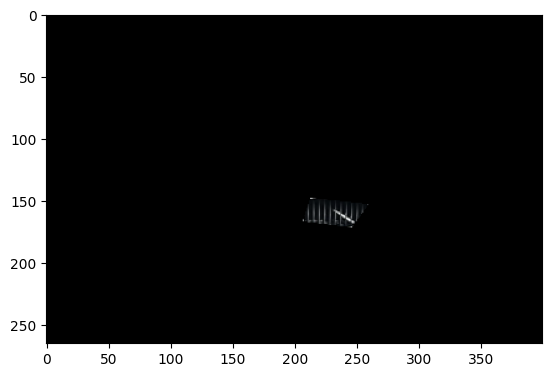

In [17]:
mask = np.zeros(gray.shape, np.uint8) #create blank image with same dimensions as the original image
new_image = cv2.drawContours(mask, [location], 0,255, -1) #Draw contours on the mask image
new_image = cv2.bitwise_and(img, img, mask=mask) #Take bitwise AND between the original image and mask image

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)) #show the final image

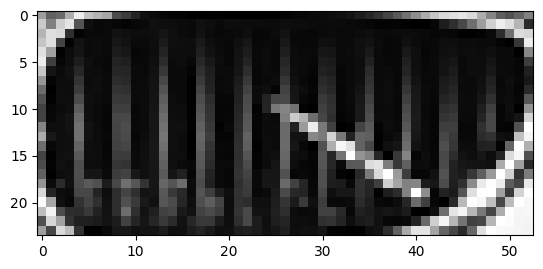

In [18]:
(x,y) = np.where(mask==255) #Find the co-ordinates of the four corners of the document
(x1, y1) = (np.min(x), np.min(y)) #Find the top left corner
(x2, y2) = (np.max(x), np.max(y)) #Find the bottom right corner
cropped_image = gray[x1:x2+1, y1:y2+1] #Crop the image using the co-ordinates

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)) #show the cropped image

In [19]:
reader = easyocr.Reader(['en']) #create an easyocr reader object with english as the language
result = reader.readtext(cropped_image) #read text from the cropped image
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[]

In [20]:
text = result[0][-2] #Extract the text from the result
font = cv2.FONT_HERSHEY_SIMPLEX #Font style
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA) #put the text on the image
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3) #Draw a rectangle around the text

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)) #show the final image with text

IndexError: list index out of range

In [38]:
imag1 = ruta + "Test1.jpg"
imag2 = ruta + "Cars120.png"

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import easyocr

def detect_plate(ruta, filename):
    # Leer imagen
    img = cv2.imread(ruta + filename)
    if img is None:
        raise Exception("No se pudo cargar la imagen")
    
    # Mostrar imagen original
    plt.figure(figsize=(10,6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Original')
    plt.axis('off')
    plt.show()

    # Convertir a escala de grises
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Mejorar contraste
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)
    
    # Reducción de ruido mejorada
    bfilter = cv2.bilateralFilter(gray, 11, 90, 90)
    
    # Mostrar imagen procesada
    plt.figure(figsize=(10,6))
    plt.imshow(bfilter, cmap='gray')
    plt.title('Imagen Procesada')
    plt.axis('off')
    plt.show()
    
    # Probar diferentes configuraciones de Canny
    edges_list = []
    parameters = [
        (30, 150),
        (50, 200),
        (80, 250)
    ]
    
    for (lower, upper) in parameters:
        edge = cv2.Canny(bfilter, lower, upper)
        edges_list.append(edge)
    
    # Combinar los resultados
    edged = np.maximum.reduce(edges_list)
    
    # Mejorar bordes con operaciones morfológicas
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    edged = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
    edged = cv2.dilate(edged, kernel, iterations=1)
    
    # Mostrar bordes detectados
    plt.figure(figsize=(10,6))
    plt.imshow(edged, cmap='gray')
    plt.title('Detección de Bordes')
    plt.axis('off')
    plt.show()
    
    # Encontrar contornos con diferentes métodos
    contours_list = []
    
    # Método 1: RETR_TREE
    keypoints1 = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours1 = imutils.grab_contours(keypoints1)
    contours_list.extend(contours1)
    
    # Método 2: RETR_EXTERNAL
    keypoints2 = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours2 = imutils.grab_contours(keypoints2)
    contours_list.extend(contours2)
    
    # Filtrar contornos
    filtered_contours = []
    img_area = img.shape[0] * img.shape[1]
    min_area = img_area * 0.01  # 1% del área de la imagen
    max_area = img_area * 0.15  # 15% del área de la imagen
    
    for contour in contours_list:
        area = cv2.contourArea(contour)
        if min_area < area < max_area:
            peri = cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
            if len(approx) >= 4:  # Permitir formas con 4 o más puntos
                # Calcular relación de aspecto
                rect = cv2.minAreaRect(contour)
                (_, (w, h), _) = rect
                aspect_ratio = max(w, h) / min(w, h)
                
                # Típicamente, las placas tienen una relación de aspecto entre 2 y 5.5
                if 1.5 < aspect_ratio < 6.0:
                    filtered_contours.append(approx)
    
    if not filtered_contours:
        raise Exception("No se detectaron contornos válidos")
    
    # Ordenar contornos por área
    contours = sorted(filtered_contours, key=cv2.contourArea, reverse=True)
    
    # Encontrar la mejor aproximación para la placa
    location = None
    for contour in contours[:10]:  # Revisar los 10 contornos más grandes
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) >= 4:
            # Verificar si forma un rectángulo aproximado
            (x, y, w, h) = cv2.boundingRect(approx)
            aspect_ratio = float(w) / h
            if 1.5 < aspect_ratio < 6.0:
                location = approx
                break
    
    if location is None:
        raise Exception("No se pudo detectar la placa")
    
    print("Location: ", location)
    
    # Crear máscara
    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [location], 0, 255, -1)
    
    # Aplicar máscara
    new_image = cv2.bitwise_and(img, img, mask=mask)
    
    # Mostrar imagen con máscara
    plt.figure(figsize=(10,6))
    plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
    plt.title('Región de la Placa')
    plt.axis('off')
    plt.show()
    
    # Extraer región de la placa
    (x,y) = np.where(mask==255)
    (x1, y1) = (np.min(x), np.min(y))
    (x2, y2) = (np.max(x), np.max(y))
    cropped_image = gray[x1:x2+1, y1:y2+1]
    
    # Preprocesar imagen recortada para mejor OCR
    cropped_image = cv2.resize(cropped_image, None, fx=2, fy=2)
    
    # Aplicar varios métodos de mejora de imagen
    # 1. Ecualización del histograma
    cropped_image = cv2.equalizeHist(cropped_image)
    
    # 2. Desenfoque Gaussiano
    cropped_image = cv2.GaussianBlur(cropped_image, (5,5), 0)
    
    # 3. Binarización adaptativa
    cropped_image = cv2.adaptiveThreshold(
        cropped_image,
        255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV,
        11,
        2
    )
    
    # 4. Eliminación de ruido
    cropped_image = cv2.medianBlur(cropped_image, 3)
    
    # Mostrar placa recortada
    plt.figure(figsize=(10,6))
    plt.imshow(cropped_image, cmap='gray')
    plt.title('Placa Recortada y Procesada')
    plt.axis('off')
    plt.show()
    
    # Realizar OCR con configuración mejorada
    reader = easyocr.Reader(['en'])
    result = reader.readtext(
        cropped_image,
        allowlist='ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789',
        batch_size=1,
        height_ths=2.0,
        width_ths=2.0,
        contrast_ths=0.3,
        adjust_contrast=0.5,
        paragraph=False
    )
    
    if not result:
        raise Exception("No se pudo leer el texto de la placa")
    
    # Post-procesar el texto
    text = result[0][-2]
    
    # Correcciones comunes
    text = text.replace('0', 'O')
    text = text.replace('1', 'I')
    if len(text) > 0 and text[0] == '0':
        text = 'H' + text[1:]
    
    # Dibujar resultados
    font = cv2.FONT_HERSHEY_SIMPLEX
    res = cv2.putText(img.copy(), text=text, org=(approx[0][0][0], approx[1][0][1]+60),
                      fontFace=font, fontScale=1, color=(0,255,0), thickness=2,
                      lineType=cv2.LINE_AA)
    res = cv2.rectangle(res, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0), 3)
    
    # Mostrar resultado final
    plt.figure(figsize=(10,6))
    plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
    plt.title(f'Resultado Final - Placa: {text}')
    plt.axis('off')
    plt.show()
    
    return text

# Función para procesar múltiples imágenes
def process_images(ruta, filenames):
    results = {}
    for filename in filenames:
        try:
            print(f"\nProcesando {filename}...")
            text = detect_plate(ruta, filename)
            results[filename] = text
            print(f"Placa detectada: {text}")
        except Exception as e:
            print(f"Error procesando {filename}: {str(e)}")
            results[filename] = "Error"
    return results

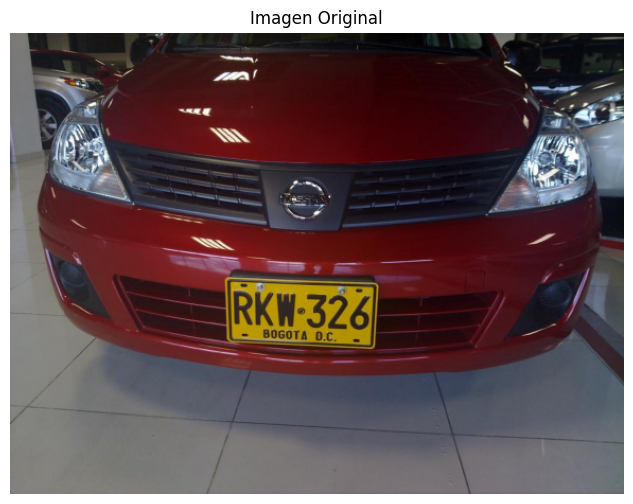

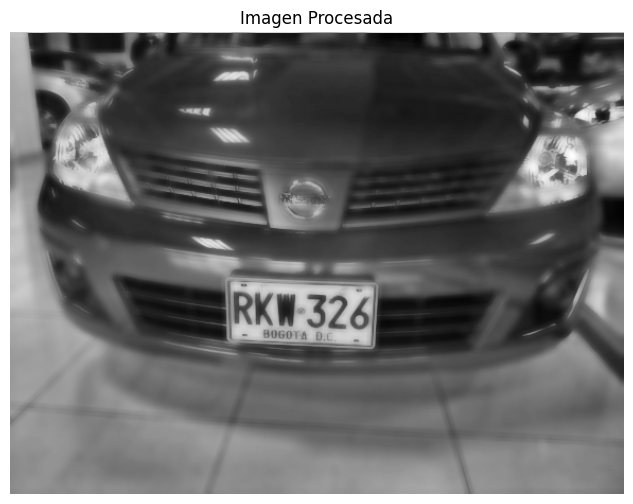

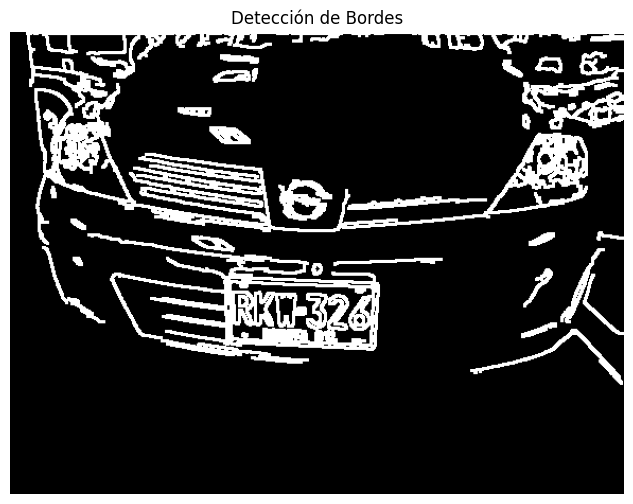

Location:  [[[ 73 190]]

 [[214 217]]

 [[ 96 228]]

 [[124 287]]

 [[345 296]]

 [[342 228]]]


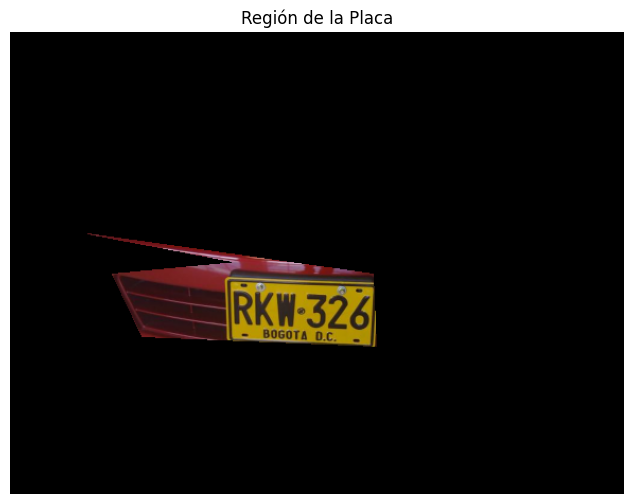

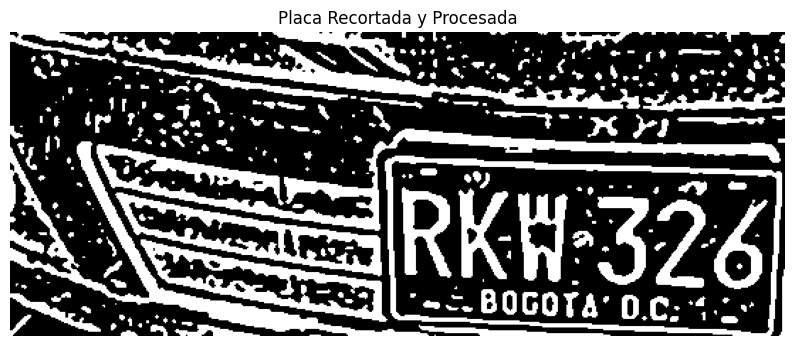

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


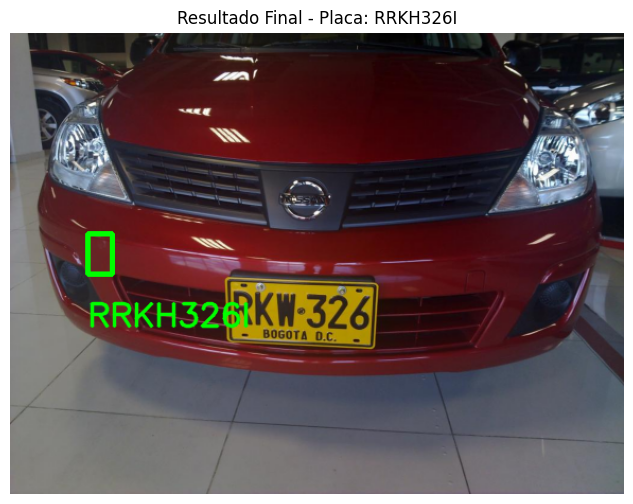

Placa detectada: RRKH326I


In [56]:
ruta = "C:/Users/delahozce/OneDrive - GLOBAL HITSS/Documentos/Proyectos/Codes/git_portafolio/Portafolio/data/imagenes_carros/"

try:
    # Procesar una sola imagen
    texto_placa = detect_plate(ruta, "carro5.png")
    print(f"Placa detectada: {texto_placa}")
except Exception as e:
    print(f"Error: {str(e)}")